In [1]:
from fractions import Fraction
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
def load_xy_data(x_path: str,
                 y_path: str) -> tuple[pd.Series, pd.Series]:
    """
    Reads two CSVs of x‐ and y‐values (no headers), converts any rational
    strings in x to floats, ensures y is numeric, and returns numpy arrays.

    Parameters
    ----------
    x_path : str
        Path to the CSV containing x values (one per line, possibly as 'a/b').
    y_path : str
        Path to the CSV containing y values (one numeric value per line).

    Returns
    -------
    x_array : numpy.ndarray
    y_array : numpy.ndarray
    """
    # Load x, convert rationals to floats
    x_df = pd.read_csv(x_path, header=None, names=['x'])
    x_df['x'] = x_df['x'].apply(lambda s: float(Fraction(s)))

    # Load y, ensure numeric
    y_df = pd.read_csv(y_path, header=None, names=['y'])
    y_df['y'] = pd.to_numeric(y_df['y'], errors='raise')

    # Return numpy arrays
    return x_df['x'].to_numpy(), y_df['y'].to_numpy()



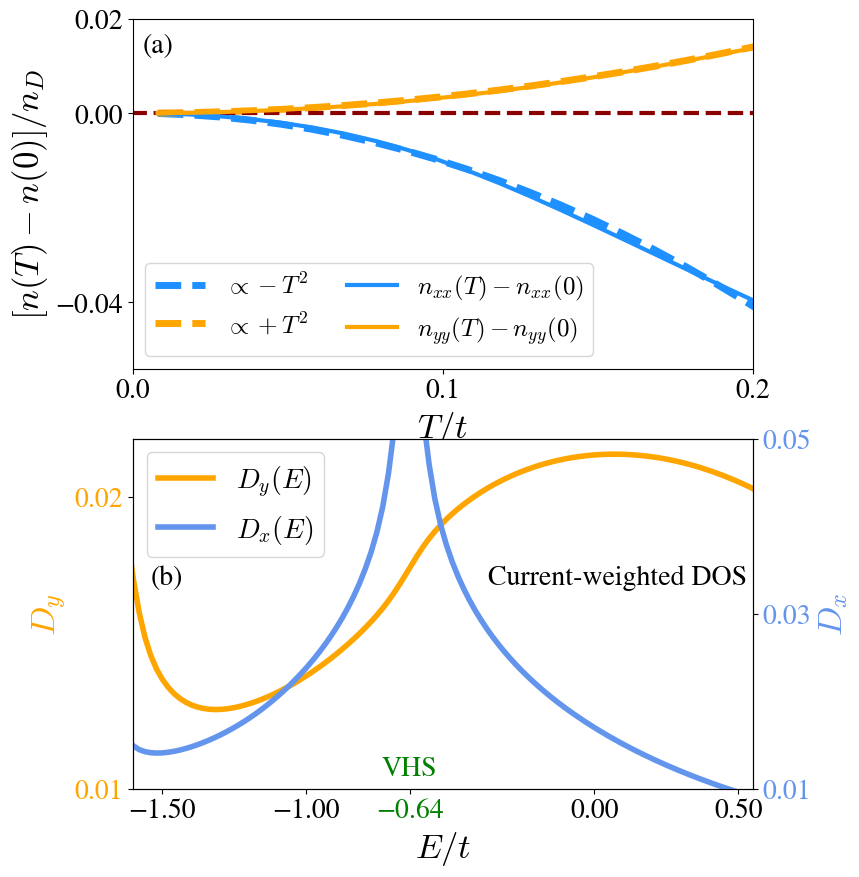

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# ─── LaTeX‐style fonts ────────────────────────────────────────────────────────
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"]     = "STIXGeneral"

 
# ——— Load each dataset separately ———
nxx = np.loadtxt('data/nxx_fig3.csv', delimiter='\t')
nH = np.loadtxt('data/Higgs_fig3.csv', delimiter='\t')
nyy = np.loadtxt('data/nyy_fig3.csv', delimiter='\t')
xaxis = np.loadtxt('data/xvalue_fig3.csv', delimiter='\t')

# ─── load data ────────────────────────────────────────────────────────────────
x_array,  y_array    = load_xy_data('data/data3_x_values.csv',    'data/data3_y_values.csv')
Wxx_array, Wxy_array = load_xy_data('data/Weigtx_x_values.csv',  'data/Weigtx_y_values.csv')
Wyx_array, Wyy_array = load_xy_data('data/Weigty_x_values.csv',  'data/Weigty_y_values.csv')
#T_axis = xaxis  # or whatever your temperature array is
 
# ─── set up 2×1 figure ───────────────────────────────────────────────────────
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=False)

# ─── subplot 1: Current‐weighted DOS ──────────────────────────────────────────
ax_dos = axs[1]
# primary curve
ax_dos.plot(Wyx_array, Wyy_array/(2*np.pi)**2,
            marker='o', markersize=0, linewidth=4, color="orange",
            label=r'$D_y(E)$')

# annotate VHS tick
ax_dos.set_xlabel(r'$E/t$', fontsize=25)
ax_dos.set_ylabel(r'$D_y$', fontsize=25, color="orange")
ax_dos.tick_params(axis='y', labelcolor="orange", labelsize=20)
ax_dos.set_xlim(-1.6, 0.55)
ax_dos.set_ylim(0.012, 0.022)
ax_dos.set_xticks([-1.5,-1, -0.64, 0, 0.5])
ax_dos.set_yticks([0.01,0.02])

ax_dos.tick_params(axis='x', labelsize=20)
 
for lbl, x in zip(ax_dos.get_xticklabels(), ax_dos.get_xticks()):
    lbl.set_color('green' if x == -0.64 else 'black')

ax_dos.text(
    -0.64, 
    ax_dos.get_ylim()[1] * 1.02,
    "VHS",
    transform=ax_dos.get_xaxis_transform(),
    ha='center',
    va='bottom',
    color='green',
    fontsize=20
)

ax_dos.text(-1.54,0.017,"(b)",fontsize=20)

# secondary y‐axis
ax2_dos = ax_dos.twinx()
ax2_dos.plot(Wxx_array, Wxy_array/(2*np.pi)**2,
             marker='o', markersize=0, linewidth=4, color="cornflowerblue",
             label=r'$D_x(E)$')
ax2_dos.set_ylabel(r'$D_x$', fontsize=25, color="cornflowerblue")
ax2_dos.tick_params(axis='y', labelcolor="cornflowerblue", labelsize=20)
ax2_dos.set_ylim(0.01, 0.05)
ax2_dos.set_yticks([0.01, 0.03, 0.05])

# combined legend
lines, labels = ax_dos.get_legend_handles_labels()
lines2, labels2 = ax2_dos.get_legend_handles_labels()
ax_dos.legend(lines + lines2, labels + labels2,
              loc='best', fontsize=20)

ax_dos.text(-0.37,0.017,"Current-weighted DOS",fontsize=20)
#ax_dos.set_title("Current-weighted DOS", fontsize=22)

# ─── subplot 2: T² behavior & Δn ─────────────────────────────────────────────
ax_T2 = axs[0]
# pure T² guides
T_axis=xaxis;
ax_T2.plot(T_axis, -1.02*T_axis**2,
           linestyle="dashed", linewidth=5, color="dodgerblue",
           label=r'$\propto -T^2$')
ax_T2.plot(T_axis,  0.35*T_axis**2,
           linestyle="dashed", linewidth=5, color="orange",
           label=r'$\propto +T^2$')

 # zero line
ax_T2.plot(T_axis-0.1, np.zeros_like(T_axis),
           linestyle="dashed", linewidth=3, color="darkred",)
 
# actual Δn curves
ax_T2.plot(T_axis, (nxx - nxx[0])/0.2889,
           '-', linewidth=3, color="dodgerblue",
           label=r"$n_{xx}(T)-n_{xx}(0)$")
ax_T2.plot(T_axis, (nyy - nyy[0])/0.2889,
           '-', linewidth=3, color="orange",
           label=r"$n_{yy}(T)-n_{yy}(0)$")
 
# labels, ticks, limits
ax_T2.set_xlabel(r'$T/t$', fontsize=25)
ax_T2.set_ylabel(r'$[n(T)-n(0)]/n_D$', fontsize=25)
ax_T2.set_xlim(0, 0.2)
ax_T2.set_ylim(-0.054, 0.02)
ax_T2.set_xticks([0, 0.1, 0.2])
ax_T2.set_yticks([-0.04, 0, 0.02])
ax_T2.tick_params(axis='x', labelsize=20)
ax_T2.tick_params(axis='y', labelsize=20)
#ax_T2.set_title(r"Temperature Dependence of $n_s$",fontsize=25)
ax_T2.legend(
    ncol=2, 
    loc='lower left', 
    fontsize=18, 
    frameon=True, 
    #facecolor='lightgray',
    columnspacing=1.5
)
#ax_T2.legend(fontsize=18)
ax_T2.grid(False)

ax_T2.text(0.003,0.013,"(a)",fontsize=20)



plt.savefig("fig3.pdf", bbox_inches='tight')